Running Elbow Method...


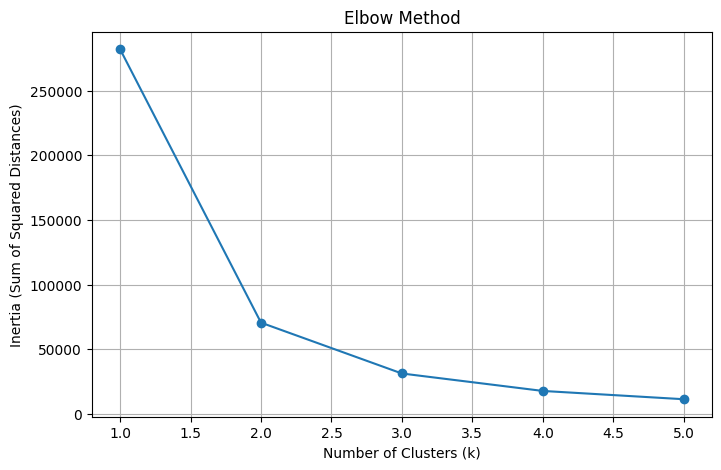

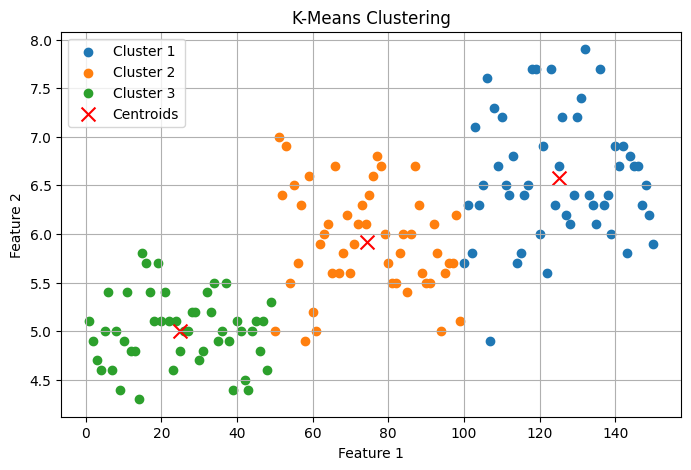

Centroids:
 [[125.           6.57058824   2.97058824   5.52352941   2.01176471]
 [ 74.5          5.922        2.78         4.206        1.304     ]
 [ 25.           5.00612245   3.42040816   1.46530612   0.24489796]]
Cluster Assignments: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Functions for K-Means
def initialize_centroids(data, k):
    indices = random.sample(range(data.shape[0]), k)
    return data[indices]

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    new_centroids = []
    for cluster_index in range(k):
        cluster_points = data[clusters == cluster_index]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            new_centroids.append(data[random.randint(0, data.shape[0] - 1)])
    return np.array(new_centroids)

def kmeans(data, k, max_iterations=100, tolerance=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        old_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        
        centroid_shift = np.linalg.norm(centroids - old_centroids)
        if centroid_shift < tolerance:
            break
    
    return centroids, clusters

def compute_inertia(data, centroids, clusters):
    inertia = 0
    for i, point in enumerate(data):
        centroid = centroids[clusters[i]]
        inertia += np.linalg.norm(point - centroid) ** 2
    return inertia

def elbow_method(data, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans(data, k)
        inertia = compute_inertia(data, centroids, clusters)
        inertias.append(inertia)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.grid()
    plt.show()
    
    return inertias

# Load data
data = pd.read_csv("iris.csv")

# Preprocess to include only numeric columns
data_numeric = data.select_dtypes(include=[np.number]).values

# Elbow method
print("Running Elbow Method...")
elbow_method(data_numeric, max_k=5)

# K-Means clustering
k = 3
centroids, clusters = kmeans(data_numeric, k)

# Visualize Clusters
plt.figure(figsize=(8, 5))
for cluster_index in range(k):
    cluster_points = data_numeric[clusters == cluster_index]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_index + 1}")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

print("Centroids:\n", centroids)
print("Cluster Assignments:", clusters)